введите в строчку через пробел: значение скорости истечения газов (м/c), массу ракеты без топлива(кг), массу топлива(кг) и количество топлива сгораемого в единицу времени(кг/с) 600 20 120 4


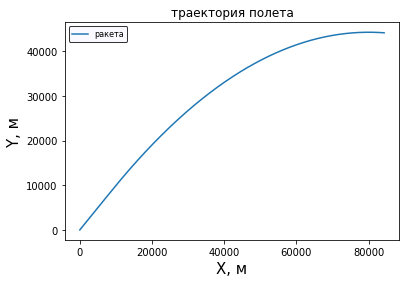

In [45]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001

class Rocket:
    def __init__(self, x, y, vx, vy, v, m1, m2, dm):
        """
        Создать ракету.

        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная начальная скорость
        vy: float
            вертикальная начальная скорость
        v: float
            относительная скорость истечения газов
        m1: float
            масса ракеты без топлива
        m2: float
            масса топлива
        dm: float
            количество топлива сгораемого в секунду
        """
        self.v = v
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.m1 = m1
        self.m2 = m2
        self.dm = dm

        self.trajectory_x = []
        self.trajectory_y = []

    def advance(self):
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT

        if self.m2 >= 0:
            self.m2 = self.m2 - MODEL_DT * self.dm
            self.vx += MODEL_DT * (F * math.cos(math.atan(self.vy / self.vx)) / (self.m1 + self.m2))
            self.vy += MODEL_DT * ((F * math.cos(math.atan(self.vy / self.vx)) - MODEL_G) / (self.m1 + self.m2))
        else:
            self.vx = self.vx
            self.vy = self.vy - MODEL_G * MODEL_DT


import numpy as np

v, m1, m2, dm = (int(i) for i in input("введите в строчку через пробел: значение скорости истечения газов (м/c),"
                      " массу ракеты без топлива(кг),"
                      " массу топлива(кг) и"
                      " количество топлива сгораемого в единицу времени(кг/с) ").split())

F = v * dm  # реактивная сила
t = m2 / dm  # время полета под действием реактивной силы
t = 4 * t  # домножим на четыре, чтобы на графике было видно, как летит ракета после сгорания всего топлива

r = Rocket(0, 0, 10, 10, v, m1, m2, dm)

bodies = [r]
# Дальше мы уже не будем думать, кто тут ёжик, кто ракета, а кто котлета —
# благодаря возможностям ООП будем просто работать со списком тел

for t in np.arange(0, t, MODEL_DT):  # для всех временных отрезков
    for b in bodies:  # для всех тел
        r.advance()  # выполним шаг
from matplotlib import pyplot as pp

pp.plot(b.trajectory_x, b.trajectory_y, label='ракета' )
pp.legend(fontsize=8,
           ncol=2,
           facecolor='#f8f8ff',
           edgecolor='black',
           title_fontsize='8')
pp.xlabel('X, м', fontsize=15) 
pp.ylabel('Y, м', fontsize=15) 
pp.title('траектория полета')
pp.show()
